<a href="https://colab.research.google.com/github/falshrawr/tensorflow-projects/blob/main/OCR_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Packages


In [ ]:
!pip install pdf2image
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install "opencv-python-headless<4.3"

     |████████████████████████████████| 63.6 MB 59 kB/s 
     |████████████████████████████████| 47.7 MB 1.5 MB/s 
     |████████████████████████████████| 21.6 MB 1.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2
import easyocr


#Visualise the text we have found in the image

In [34]:

def visualiseResult(results, File_Path):
  text_found = ''
  img = cv2.imread(File_Path)
  for result in results:
      #coordinates to draw a box around each piece of text found.
      top_corner = tuple((int(val)) for val in result[0][0])
      bottom_corner = tuple((int(val)) for val in result[0][2])
      #saves the results of the text found
      text_found += (' , ' + result[1])
      font = cv2.FONT_HERSHEY_SIMPLEX
      img = cv2.rectangle(img, top_corner, bottom_corner, (0,100,255), 5)
      img = cv2.putText(img, text_found, top_corner, font, 1, (0,0,0), 2, cv2.LINE_AA)
  return img, text_found   
  

Load in a list of file paths to Images we want to analyse.

In [31]:
filelist = pd.read_csv('filelist.csv')
filelist

,Text_Found,File_Path
0,NaN,images/1.png
1,NaN,images/2.png
2,NaN,images/3.png
3,NaN,images/4.png
4,NaN,images/5.png
5,NaN,images/9.png
6,NaN,images/organic.png


For each image, we use the Optical Character recognition reader to identify the text found, then add this to the database for each image, and visualise the image. 

In [32]:
reader = easyocr.Reader(['en'])
for index, image in filelist.iterrows():
  File_Path = image['File_Path']
  results = reader.readtext(File_Path)
  img, text_found = visualiseResult(results, File_Path)
  filelist.loc[index, 'Text_Found'] = text_found
  

#Saves the text found in each Image


In [33]:
filelist

,Text_Found,File_Path
0,", Tips and Tricks , Sustainable , Living",images/1.png
1,", New Horizons , After winning significant fu...",images/2.png
2,", 5 , Go Organic , Protect our soil. Heavy , ...",images/3.png
3,", Revolutionize , Sustainability , Reporting ...",images/4.png
4,", 03. , Sustainability Action Plan , Our , su...",images/5.png
5,", Precise A , Evaluation , Our powerful propr...",images/9.png
6,", Host = , Significant Component Organic Netw...",images/organic.png


Displays the results and highlights where the text was found in each image.

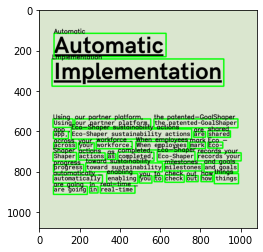

In [ ]:
plt.imshow(img)
plt.show()